Intialization

In [1]:
import numpy as np
import pandas as pd
import warnings
from sklearn.exceptions import DataConversionWarning

import seaborn as sns
import matplotlib.pyplot as plt

import lime
import lime.lime_tabular
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.inspection import permutation_importance

warnings.filterwarnings(action='ignore', category=UserWarning)
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

Data Initial Exploratory

In [2]:
#load dataset
df = pd.read_csv('C:/Users/josep/OneDrive/Desktop/small python project/Churn Rate Prediciton/BankChurners.csv')
df.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,0.000055,0.99994
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,...,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066,0.000123,0.99988
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,...,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048,0.000086,0.99991
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,...,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113,0.000045,0.99996
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,...,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144,0.000303,0.99970


In [3]:
#check general shape and information
print(df.shape, '\n')         #10127 rows and 23 columns
df.info()               

(10127, 23) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                             

In [4]:
#check duplicate records
print(df.duplicated().sum())
df[df.duplicated()]

0


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2


In [5]:
#check for null values
print(df.isna().sum())

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [6]:
#general distribution in dataset
mean_mode_df = df.drop(columns=['CLIENTNUM'] + [c for c in df.columns if c.startswith('Naive')])
num_cols = mean_mode_df.select_dtypes(include='number').columns
cat_cols = mean_mode_df.select_dtypes(include='object').columns

mean_mode_df = pd.concat([(df[num_cols].mean()), (df[cat_cols].mode().iloc[0])])
mean_mode_df

Customer_Age                         46.32596
Dependent_count                      2.346203
Months_on_book                      35.928409
Total_Relationship_Count              3.81258
Months_Inactive_12_mon               2.341167
Contacts_Count_12_mon                2.455317
Credit_Limit                      8631.953698
Total_Revolving_Bal               1162.814061
Avg_Open_To_Buy                   7469.139637
Total_Amt_Chng_Q4_Q1                 0.759941
Total_Trans_Amt                   4404.086304
Total_Trans_Ct                      64.858695
Total_Ct_Chng_Q4_Q1                  0.712222
Avg_Utilization_Ratio                0.274894
Attrition_Flag              Existing Customer
Gender                                      F
Education_Level                      Graduate
Marital_Status                        Married
Income_Category                Less than $40K
Card_Category                            Blue
dtype: object

Data Cleaning

In [7]:
#dropping unnecessary columns
df = df.drop(columns=['CLIENTNUM'] + [c for c in df.columns if c.startswith('Naive')])

In [8]:
#capitalize column names
df.columns = df.columns.str.title()

#standardizing values
#attrition
print(df['Attrition_Flag'].unique())
df['Attrition_Flag'] = df['Attrition_Flag'].apply(lambda x: 'Existing' if x.startswith('Existing') else 'Attrited')

#gender
print(df['Gender'].unique())
df['Gender'] = df['Gender'].replace({'M':'Male', 'F':'Female'})

#education level
print(df['Education_Level'].unique())
print(df['Education_Level'].value_counts())
df['Education_Level'] = df['Education_Level'].replace({'Graduate':'Bachelors', 'Post-Graduate':'Masters'}) 
#check if there are clear clusters with churn and non-churned for 'Unknown'

#marital status
print(df['Marital_Status'].unique())
print(df['Marital_Status'].value_counts())
#check if 'Unknown' impacts feature significance and importance on churn probability

#credit limit and open to buy both only have 1 float value
#credit limit
df['Credit_Limit'] = df['Credit_Limit'].astype(int)
df['Avg_Open_To_Buy'] = df['Avg_Open_To_Buy'].astype(int)

#average utilization rate
df['Avg_Utilization_Ratio'] = df['Avg_Utilization_Ratio'] * 100

#investigate 'Unknown' in Education Level, Marital Status 

['Existing Customer' 'Attrited Customer']
['M' 'F']
['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64
['Married' 'Single' 'Unknown' 'Divorced']
Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64


In [9]:
#final resulting dataset
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_Count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_On_Book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_Mon    10127 non-null  int64  
 11  Contacts_Count_12_Mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  int64  
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

,Attrition_Flag,Customer_Age,Gender,Dependent_Count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_On_Book,Total_Relationship_Count,Months_Inactive_12_Mon,Contacts_Count_12_Mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing,45,Male,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691,777,11914,1.335,1144,42,1.625,6.1
1,Existing,49,Female,5,Bachelors,Single,Less than $40K,Blue,44,6,1,2,8256,864,7392,1.541,1291,33,3.714,10.5
2,Existing,51,Male,3,Bachelors,Married,$80K - $120K,Blue,36,4,1,0,3418,0,3418,2.594,1887,20,2.333,0.0
3,Existing,40,Female,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313,2517,796,1.405,1171,20,2.333,76.0
4,Existing,40,Male,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716,0,4716,2.175,816,28,2.500,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing,50,Male,2,Bachelors,Single,$40K - $60K,Blue,40,3,2,3,4003,1851,2152,0.703,15476,117,0.857,46.2
10123,Attrited,41,Male,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277,2186,2091,0.804,8764,69,0.683,51.1
10124,Attrited,44,Female,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409,0,5409,0.819,10291,60,0.818,0.0
10125,Attrited,30,Male,2,Bachelors,Unknown,$40K - $60K,Blue,36,4,3,3,5281,0,5281,0.535,8395,62,0.722,0.0


Data Exploratory Analysis

In [10]:
#Question 1 : What do high-risked churn customers from existing look like when compared to churned customers?
#Question 2 : Which feature have the most significant impact towards churning decision?

In [11]:
#compare average distribution between churned customers and non-churned customers
num_cols = df.select_dtypes(include='number').columns
cat_cols = df.select_dtypes(include='object').columns

non_churned_df = df[df['Attrition_Flag'] == 'Existing']
non_churned_df = pd.concat([(non_churned_df[num_cols].mean().round(2)), (non_churned_df[cat_cols].mode().iloc[0])])

churned_df = df[df['Attrition_Flag'] == 'Attrited']
churned_df = pd.concat([(churned_df[num_cols].mean().round(2)), (churned_df[cat_cols].mode().iloc[0])])

all_df = pd.concat([non_churned_df, churned_df], axis=1, keys=['Existing', 'Churned'])
all_df

#both churned and existing customers show a lot of similarities in average
#the differences can be found in 
#financial stress (credit limit, total revolving balance, open to buy, average utilization rate)
#engagement (total relationship, months inactive, contact counts, months on book)
#transaction activity (Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Trans_Ct, Total_Ct_Chng_Q4_Q1)
#churned customers have lesser engagement than existing customers
#the financial stress however is harder to interpret as the average amount for purchasing 
#is still higher in existing customer
#but since the mode suggest identical income categories
#it is hard to judge whether it is due to dataset influence or financial stress
#demographics need to be investigated via countplot

,Existing,Churned
Customer_Age,46.26,46.66
Dependent_Count,2.34,2.4
Months_On_Book,35.88,36.18
Total_Relationship_Count,3.91,3.28
Months_Inactive_12_Mon,2.27,2.69
Contacts_Count_12_Mon,2.36,2.97
Credit_Limit,8726.86,8136.02
Total_Revolving_Bal,1256.6,672.82
Avg_Open_To_Buy,7470.26,7463.19
Total_Amt_Chng_Q4_Q1,0.77,0.69


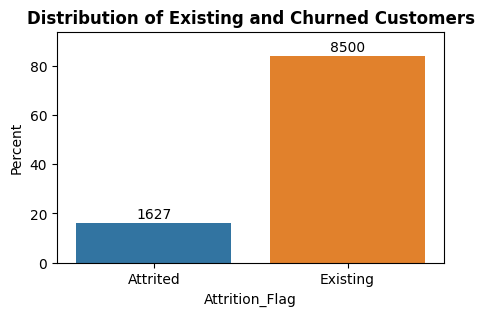

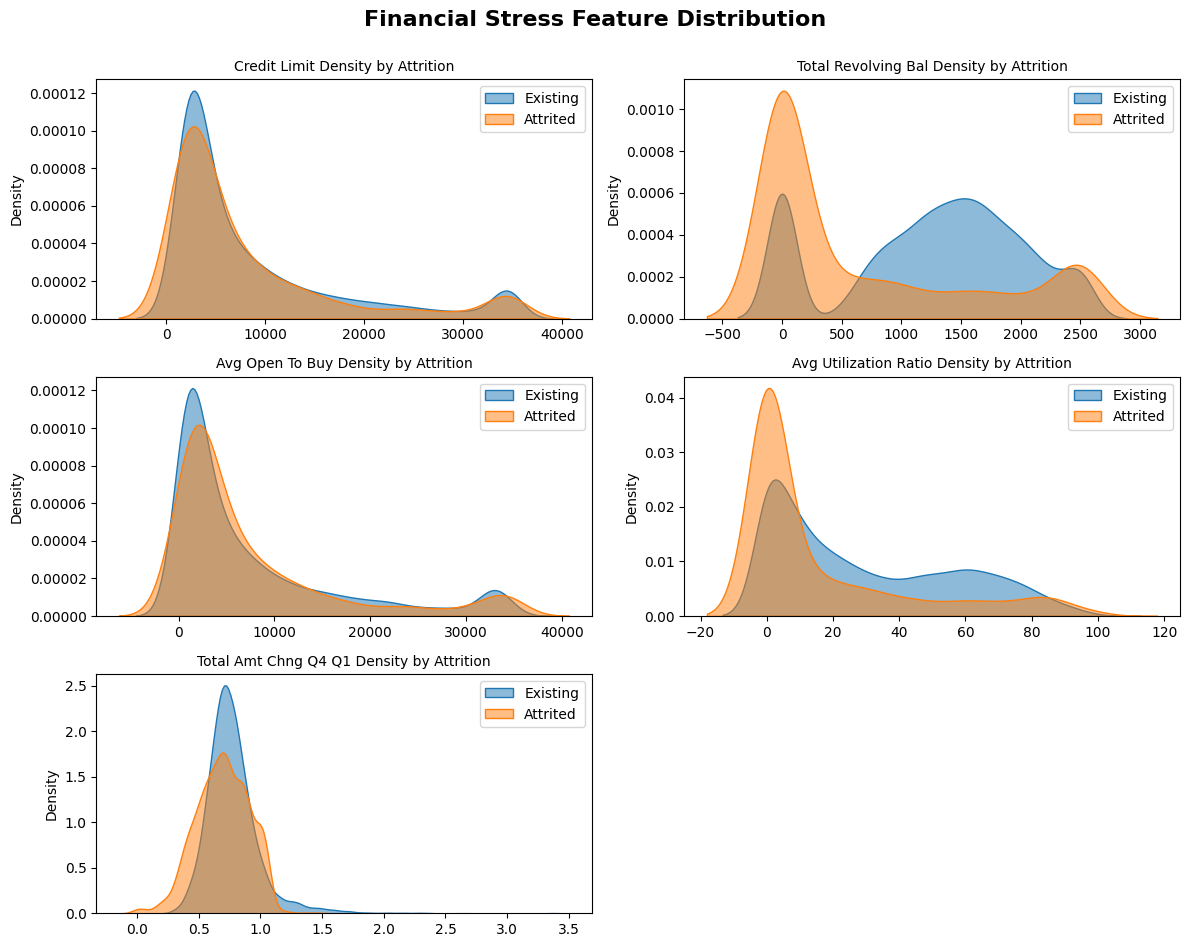

In [12]:
#pre churn probability study
#overall distribution
total_dist = df['Attrition_Flag'].value_counts()
total_dist = df.groupby('Attrition_Flag').size().reset_index(name='Count')
total_dist['Percent'] = round(total_dist['Count'] * 100 / total_dist['Count'].sum(), 2)

plt.figure(figsize=(5,3))
sns.barplot(x='Attrition_Flag', y='Percent', data=total_dist, hue='Attrition_Flag')
for i, row in total_dist.iterrows():
    plt.text(i, row['Percent'] + 2, f"{row['Count']}", ha='center')
plt.title('Distribution of Existing and Churned Customers', weight='bold')
plt.ylim(0, total_dist['Percent'].max()+10)
plt.show()

#financial stress feature distribution
financial_features = ['Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy','Avg_Utilization_Ratio',
                      'Total_Amt_Chng_Q4_Q1']
fin_stress_df = df[['Attrition_Flag'] + financial_features]


cols = 2
rows = int(np.ceil(len(df.columns) / cols))
fig, axes = plt.subplots(rows, cols, figsize=(6*cols,3*rows))
axes = axes.flatten()
for i, feature in enumerate(financial_features):
    sns.kdeplot(data=fin_stress_df[fin_stress_df['Attrition_Flag']=='Existing'], x=feature, 
                label='Existing', fill=True, alpha=0.5, ax=axes[i])
    sns.kdeplot(data=fin_stress_df[fin_stress_df['Attrition_Flag']=='Attrited'], x=feature, 
                label='Attrited', fill=True, alpha=0.5, ax=axes[i])
    axes[i].set_title(f'{feature.replace("_", " ")} Density by Attrition', size=10)
    handles, labels = axes[i].get_legend_handles_labels()
    axes[i].legend(handles, labels)
    axes[i].set_xlabel('')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  

plt.suptitle('Financial Stress Feature Distribution', y=1, weight='bold', fontsize=16)
plt.tight_layout()
plt.show()


#credit limit show identical pattern (right-skewed with long tail), with a slight incrase at the largest values
#total revolving balance among both groups show large density at 0, with slight incrase at the largest values
#however among existing customers, 1500 revolving balance show a very large destiny as well
#open amount for purchase also show identical pattern to credit limit
#this means that a large portion of customers associated with this bank either has no financial stress
#or big financial stress
#and 1500 revolting balance could be bank-imposed standard 
#minimum payment, credit card requirement, or typical monthly usage, typically an obligation for the service
#these are main reason as to why the average of total revolving balance is much higher in existing customers 
#however the average average utilization rate can be seen to be more evenly distributed among existing
#while churne customer congregate around 0
#though average utilization rate can be interpreted also as engagement activity
#total transaction amount from quarter 1 to quarter 4 in attrified group is more evenly distributed
#this can be due to difference in income groups
#while existing group show consistent spending habit from Q1 to Q4

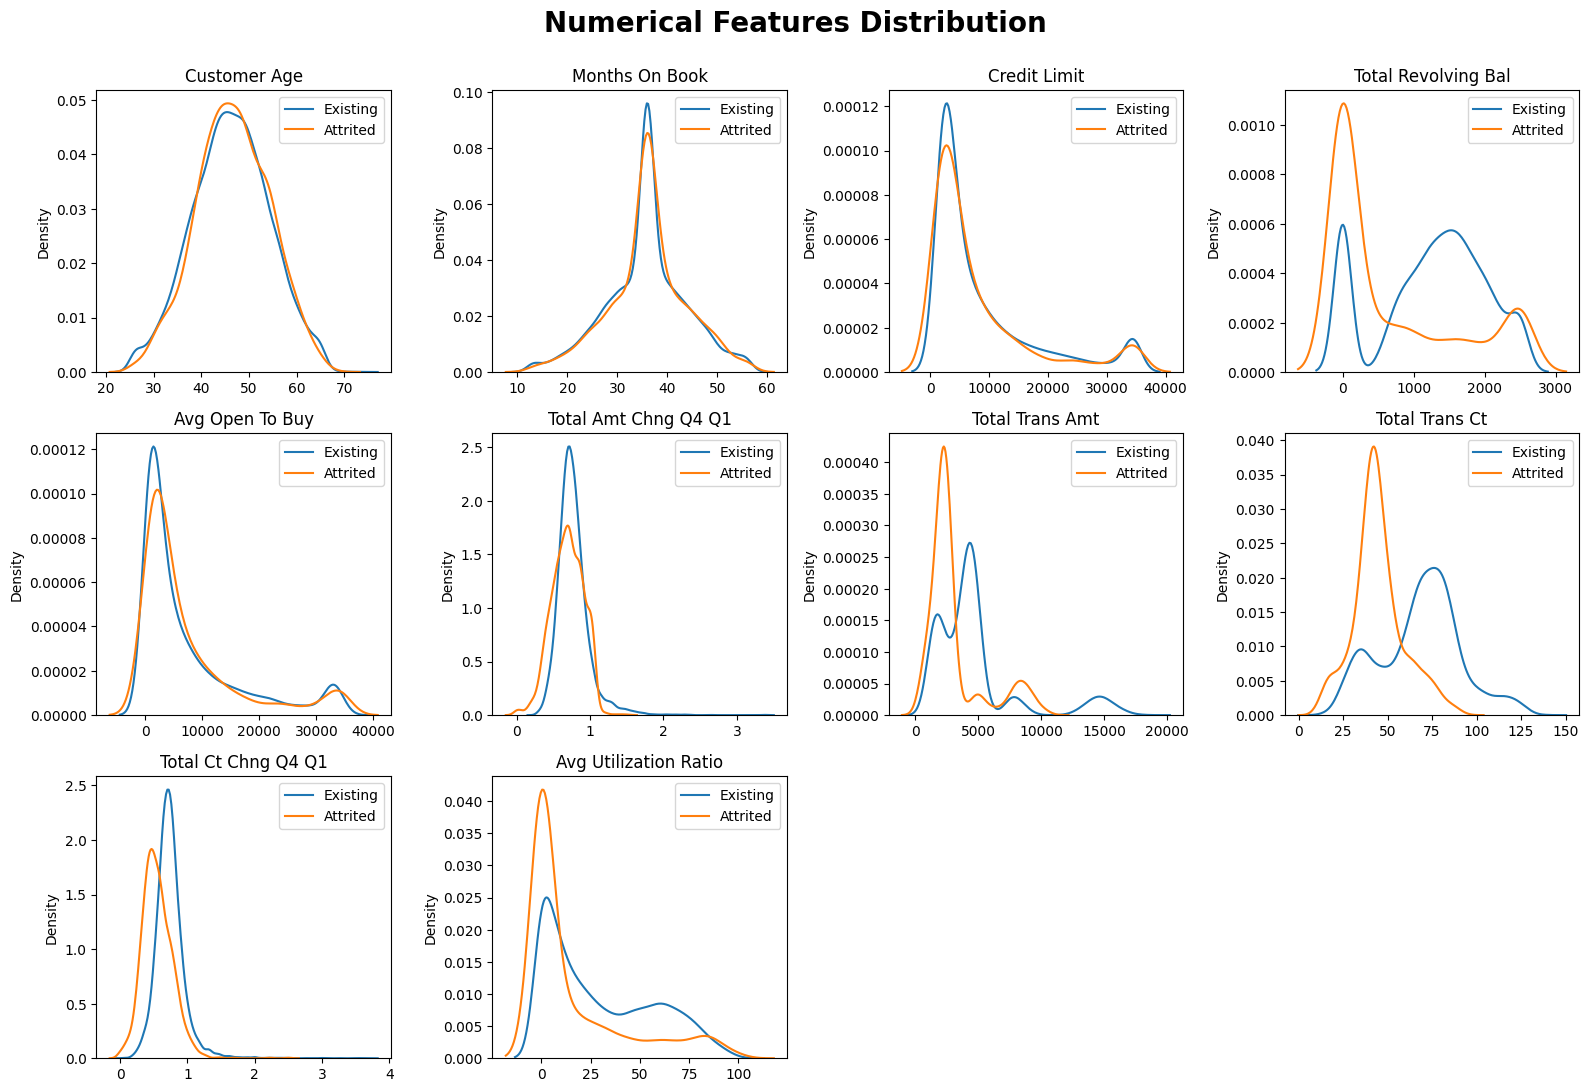

In [13]:
#general distribution analysis
#numerical
num_cols = ['Customer_Age', 'Months_On_Book', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy',
            'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 
            'Avg_Utilization_Ratio']

cols = 4
rows = int(np.ceil(len(df.columns) / cols))
fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 3.5*rows))
axes = axes.flatten()

for i, feature in enumerate(num_cols):
        sns.kdeplot(x=feature, label='Existing', data=df[df['Attrition_Flag']=='Existing'], ax=axes[i])
        sns.kdeplot(x=feature, label='Attrited', data=df[df['Attrition_Flag']=='Attrited'], ax=axes[i])
        axes[i].set_title(feature.replace("_", " "))
        handles, labels = axes[i].get_legend_handles_labels()
        axes[i].legend(handles, labels)
        axes[i].set_xlabel('')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  
plt.suptitle('Numerical Features Distribution', fontsize=20, weight='bold', y=1)
plt.tight_layout()
plt.show()

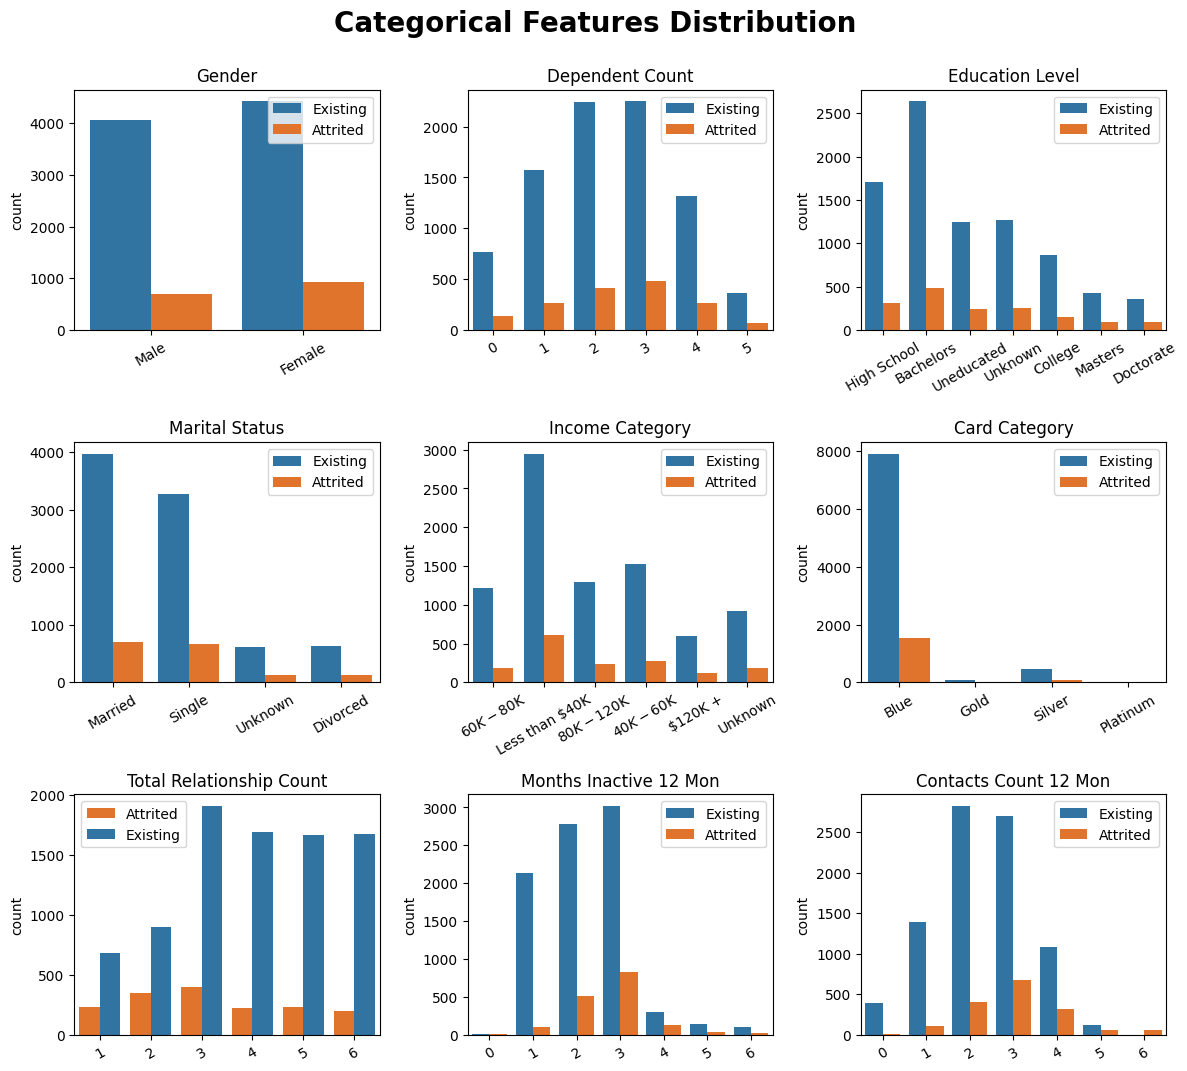

In [14]:
cat_cols = [col for col in df.columns if col not in num_cols and col != 'Attrition_Flag']

cols = 3
rows = int(np.ceil(len(df.columns) / cols))
fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 3.5*rows))
axes = axes.flatten()

palette = {'Existing': '#1f77b4',  'Attrited': "#ff6e0e"}

for i, feature in enumerate(cat_cols):
        sns.countplot(x=feature, hue='Attrition_Flag', data=df, ax=axes[i], palette=palette)
        axes[i].set_title(feature.replace("_", " "))
        axes[i].tick_params(axis='x', rotation=30)
        handles, labels = axes[i].get_legend_handles_labels()
        axes[i].legend(handles, labels)
        axes[i].set_xlabel('')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  
plt.suptitle('Categorical Features Distribution', fontsize=20, weight='bold', y=1)
plt.tight_layout()
plt.show()

#dataset has way more existing customer than attrified
#depending on churn probability accuracy, need for over sampling or SMOTE for accuracy

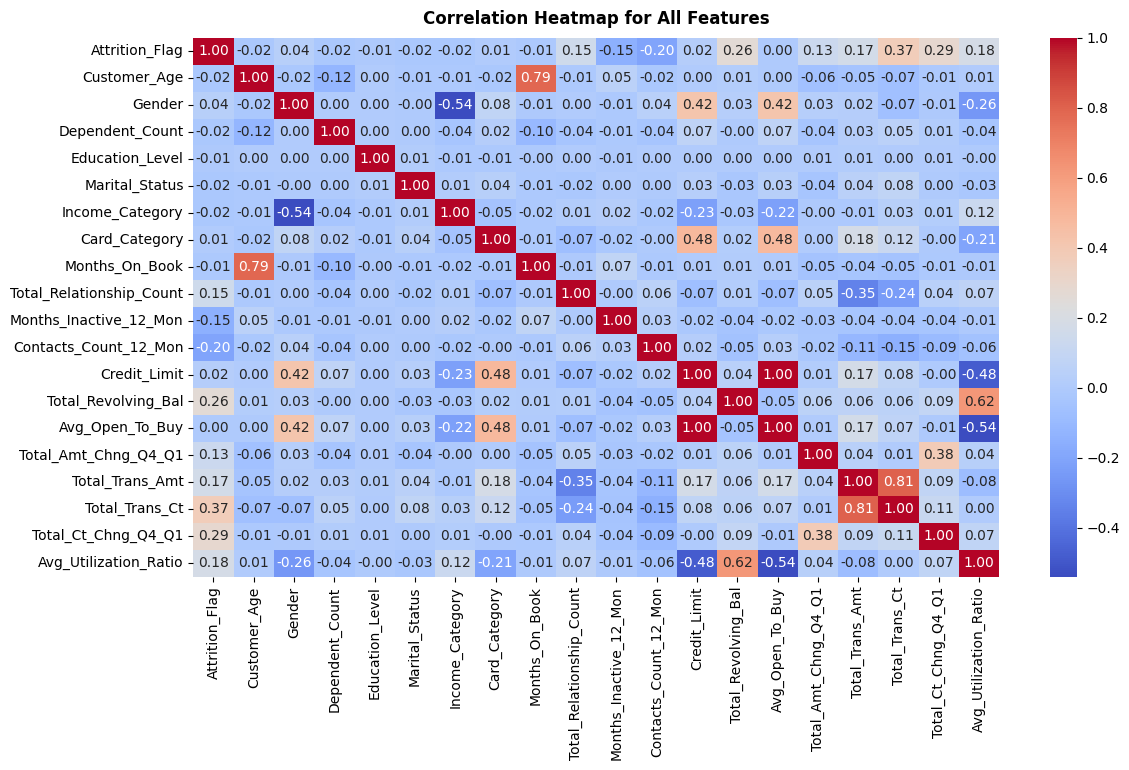

In [15]:
#checking correlation between features
#apply labelencoder to categorical columns 
num_cols = df.select_dtypes(include='number').columns
cat_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()

temp_df = df.copy()
for col in cat_cols:
    temp_df[col] = le.fit_transform(temp_df[col])

#finding correlations
temp_df = temp_df.corr()
plt.figure(figsize=(13,7))
sns.heatmap(temp_df, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap for All Features', y=1.01, weight='bold')
plt.show()  

#'Age' and 'Months on Book' show strong correlation
#but these columns have totally representation so its fine to leave it
#credit limit is moderately correlated with card category
#probably tied to service, where credit limit increase with better card group to some extent
#credit limit and average open buy has full correlation 
#their interpretation and grouping are same, so it is save to drop one of them
#total transaction count and amount both relates to engagement activity but different interpretation
#since engagment activity is the main driving group for attrified vs existing
#investigate with SHAP and feature importance whether to drop one and which 
#utilization rate and revolving balance also show strong correlation
#both of them interpret similarly, but utilization rate can be linked with engagement activity
#needs to compare with other engagement activity features
#utilization rate also show moderate correlation with credit limit and open buy
#if low importance, drop as it may hurt model interpretability


Feature Importance Study & Churn Probability

In [16]:
#use attrited probability as churn risk assessment 
#setting up X features and y target
churn_map = {
    'Existing': 0,
    'Attrited': 1
}

df["Income_Category"] = df["Income_Category"].replace({"Unknown": pd.NA})
X = df.drop(columns=['Attrition_Flag', 'Avg_Open_To_Buy'])
y = df['Attrition_Flag'].map(churn_map)

cat_cols = df.select_dtypes(include='object').columns
cat_cols = [c for c in cat_cols if c not in ('Attrition_Flag','Income_Category')]
num_cols = df.select_dtypes(include='number').columns

income_order = ['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +']

oe = OrdinalEncoder(categories=[income_order], handle_unknown='use_encoded_value', unknown_value=-1)
ohe = OneHotEncoder(drop='first', handle_unknown='ignore')

X['Income_Category'] = oe.fit_transform(X[['Income_Category']])
encoded = ohe.fit_transform(X[cat_cols])
encoded_df = pd.DataFrame(encoded.toarray(), columns=ohe.get_feature_names_out(), index=X.index)

X = X.drop(columns=cat_cols)
X = pd.concat([X, encoded_df], axis=1)


In [17]:
#set up training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

model = RandomForestClassifier(n_estimators=300, max_depth=None, class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

churn_proba = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, churn_proba) 
print("ROC AUC:", roc_auc)

#roc_auc score is high, meaning predicting true positive rate is much better compared to false positive rate
#able to discern clearly attrited and existing

ROC AUC: 0.9864993442771219


In [18]:
#identify what kind of features impact churn probability prediction the most
result = permutation_importance(model, X_test, y_test, scoring='roc_auc', n_repeats=10, random_state=42)

perm_importances = pd.Series(result.importances_mean, index=X_test.columns)
perm_importances = perm_importances.sort_values(ascending=False)

print(perm_importances.head(10))  

#based on the top 3 features (> 0.01)
#the main driving metrics for churn probability are transaction and engagement activity
#total transaction count and amount are the leading features for churn probability 

Total_Trans_Ct              0.133994
Total_Trans_Amt             0.078243
Total_Relationship_Count    0.013245
Total_Revolving_Bal         0.009552
Total_Ct_Chng_Q4_Q1         0.007307
Total_Amt_Chng_Q4_Q1        0.006511
Months_Inactive_12_Mon      0.003669
Customer_Age                0.002512
Credit_Limit                0.002194
Avg_Utilization_Ratio       0.001735
dtype: float64


In [19]:
#Using LIME to determine which feature is more important between the strong correlated feature
#LIME only test on one data point, therefore other correlated features should be dropped and tested 

selected_features = ['Avg_Utilization_Ratio', 'Total_Revolving_Bal', 'Credit_Limit']
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data = X_train.values,       
    feature_names = X_train.columns.tolist(),
    class_names = ['Existing', 'Attrited'],
    mode = 'classification',
    random_state = 42
)
exp = explainer.explain_instance(
    data_row = X_test.iloc[0].values,
    predict_fn = model.predict_proba,
    num_features = X_train.shape[1] 
)
exp_df = pd.DataFrame(exp.as_list(), columns=['feature', 'contribution']).sort_values(by='contribution', ascending=False)
exp_df_selected = exp_df[exp_df['feature'].str.contains('|'.join(selected_features))]
print(exp_df_selected)

#since ROC_AUC score already gave a very high score, there is no need for optimization
#if optimization is needed, try ddropping Total Revolving Balance feature and test 

                              feature  contribution
26  2562.00 < Credit_Limit <= 4532.00     -0.000913
5       Avg_Utilization_Ratio > 50.40     -0.016605
3       Total_Revolving_Bal > 1786.00     -0.036402


Comparing Attrited and Churn-risked Customers

In [20]:
#apply churn probability to main dataframe
df['churn_proba'] = model.predict_proba(X)[:, 1]
df['high_risk'] = (df['churn_proba'] > 0.65) & (df['Attrition_Flag'] == 'Existing')
churned_risked = df[df['high_risk']]
print('Number of churn-risked customers: ', len(churned_risked))

#only 7 existing customers have more than 65% churn probability

Number of churn-risked customers:  7


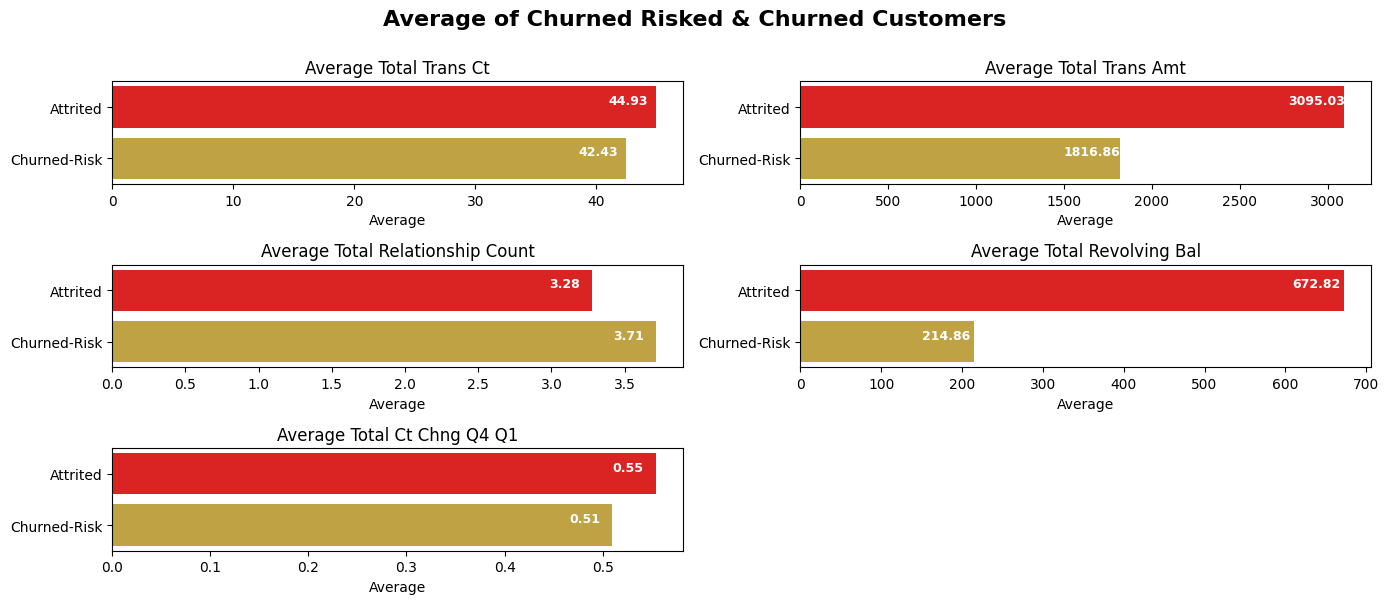

In [21]:
#find similarities between churned and churn-risked customers
#use top 5 features to visualize the two clusters
#Total_Trans_Ct, Total_Trans_Amt, Total_Relationship_Count, Total_Revolving_Bal, Total_Ct_Chng_Q4_Q1, Total_Amt_Chng_Q4_Q1

top_features = ['Total_Trans_Ct', 'Total_Trans_Amt', 'Total_Relationship_Count', 'Total_Revolving_Bal','Total_Ct_Chng_Q4_Q1']
churned_risked_df = df[df['high_risk']]                     #cluster 1
attrited_df = df[df['Attrition_Flag'] == 'Attrited']        #cluster 2

plot_df = pd.concat([
    churned_risked_df[top_features].assign(group='Churned-Risk'),
    attrited_df[top_features].assign(group='Attrited')
])

avg_df = plot_df.groupby('group')[top_features].mean().reset_index()
avg_df = pd.melt(avg_df, id_vars='group', var_name='Criteria', value_name='Value')
cols = 2
rows = int(np.ceil(len(top_features) / cols))
fig, axes = plt.subplots(rows, cols, figsize=(7*cols, 2*rows))
axes = axes.flatten()

palette = {'Churned-Risk': "#d3ad30",  'Attrited': "#f80404"}

for i, feature in enumerate(top_features):
    sub = avg_df[avg_df['Criteria'] == feature]
    sns.barplot(x='Value', y='group', data=sub, hue='group', ax=axes[i], orientation='horizontal', palette=palette)
    axes[i].set_title(f'Average {feature.replace("_", " ")}')
    axes[i].set_xlabel('Average')
    axes[i].set_ylabel('')

    for p in axes[i].patches:
        value = p.get_width()         
        y = p.get_y() + p.get_height() / 2
        axes[i].annotate(f'{value:.2f}', (value, y), xytext=(-20,0), textcoords='offset points',
                         ha='center', va='bottom', fontsize=9, fontweight='bold', color='white')
        
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  
plt.suptitle('Average of Churned Risked & Churned Customers', fontsize=16, weight='bold', y=1)
plt.tight_layout()
plt.show()
    
#the features with the most similarities between churned-risked and attrited 
#average total transaction count change from Q4 to Q1 
#average total transaction count

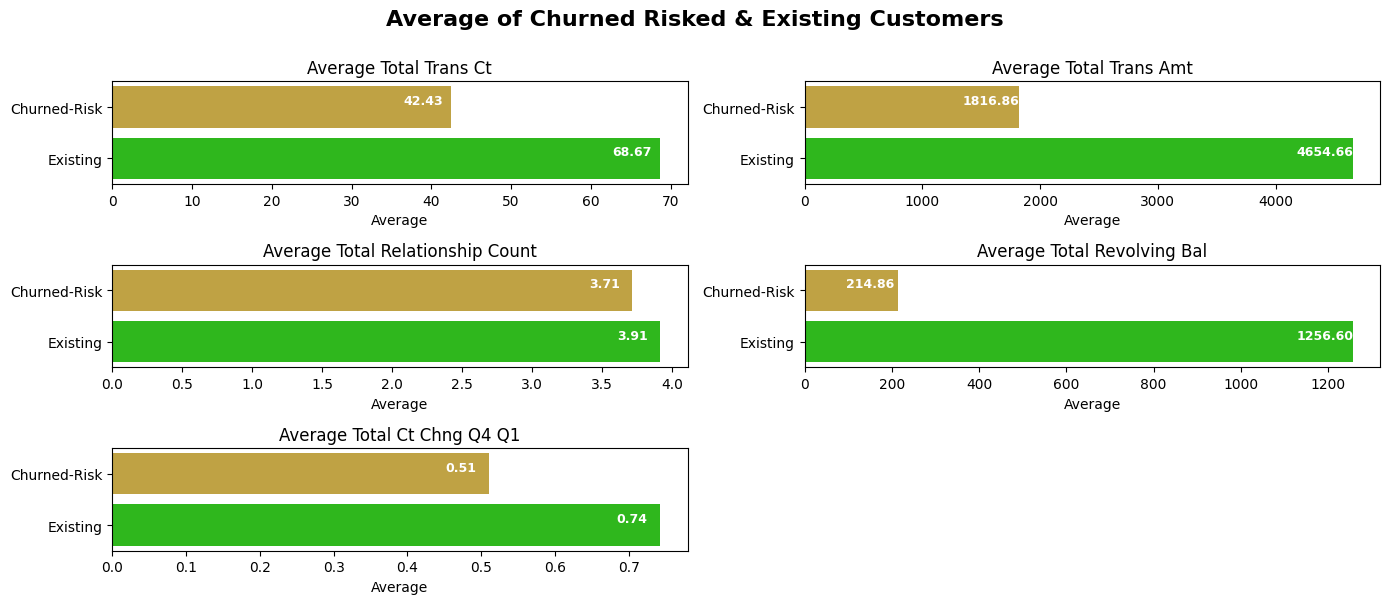

In [22]:
#find difference between existing and churn-risked customers
top_features = ['Total_Trans_Ct', 'Total_Trans_Amt', 'Total_Relationship_Count', 'Total_Revolving_Bal','Total_Ct_Chng_Q4_Q1']
churned_risked_df = df[df['high_risk']]                     #cluster 1
existing_df = df[df['Attrition_Flag'] == 'Existing']        #cluster 2

plot_df = pd.concat([
    churned_risked_df[top_features].assign(group='Churned-Risk'),
    existing_df[top_features].assign(group='Existing')
])

avg_df = plot_df.groupby('group')[top_features].mean().reset_index()
avg_df = pd.melt(avg_df, id_vars='group', var_name='Criteria', value_name='Value')
cols = 2
rows = int(np.ceil(len(top_features) / cols))
fig, axes = plt.subplots(rows, cols, figsize=(7*cols, 2*rows))
axes = axes.flatten()

palette = {'Churned-Risk': "#d3ad30",  'Existing': "#1bd103"}

for i, feature in enumerate(top_features):
    sub = avg_df[avg_df['Criteria'] == feature]
    sns.barplot(x='Value', y='group', data=sub, hue='group', ax=axes[i], orientation='horizontal', palette=palette)
    axes[i].set_title(f'Average {feature.replace("_", " ")}')
    axes[i].set_xlabel('Average')
    axes[i].set_ylabel('')

    for p in axes[i].patches:
        value = p.get_width()         
        y = p.get_y() + p.get_height() / 2
        axes[i].annotate(f'{value:.2f}', (value, y), xytext=(-20,0), textcoords='offset points',
                         ha='center', va='bottom', fontsize=9, fontweight='bold', color='white')
        
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  
plt.suptitle('Average of Churned Risked & Existing Customers', fontsize=16, weight='bold', y=1)
plt.tight_layout()
plt.show()

#churned risked and existing customers only share similarity in terms of total relationship count
#the most apparent difference can be seen in total transaction amount and total revolving balance
#existing customers show signals in financial stress and transaction activity patterns before churning

Evaluating Risk Assessment After Feature Improvement

In [23]:
#improve total transaction count, total transaction amount and total revolving balance to be more like existing customers
#check churned probability threshold 65%
features = ['Total_Trans_Ct', 'Total_Trans_Amt', 'Total_Relationship_Count',
                  'Total_Revolving_Bal', 'Total_Ct_Chng_Q4_Q1']
prev_prob = df[df['high_risk']].copy()
prev_prob['Total_Trans_Ct'] += 20
prev_prob['Total_Trans_Amt'] += 2500
prev_prob['Total_Revolving_Bal'] += 800

prev_prob['Income_Category'] = oe.fit_transform(prev_prob[['Income_Category']])
X_risk = prev_prob.reindex(columns=X.columns, fill_value=0)
prev_prob['new_churn_proba'] = model.predict_proba(X_risk)[:, 1]
prev_prob['percentage_reduced'] = (prev_prob['churn_proba']*100 - prev_prob['new_churn_proba']*100).round(2)
prev_prob = prev_prob.sort_values(by='churn_proba', ascending=False)
prev_prob['percentage_reduced'] = prev_prob['percentage_reduced'].astype(str) + '%'

print('Number of churn-risked customers: ', len(prev_prob[prev_prob['new_churn_proba'] > 0.65]))
prev_prob[['churn_proba','new_churn_proba','percentage_reduced']]


Number of churn-risked customers:  0


,churn_proba,new_churn_proba,percentage_reduced
886,0.800000,0.640000,16.0%
40,0.700000,0.583333,11.67%
3387,0.696667,0.023333,67.33%
105,0.683333,0.320000,36.33%
920,0.680000,0.423333,25.67%
6976,0.673333,0.013333,66.0%
4588,0.666667,0.030000,63.67%


Extra : Data Analytical Case Studies

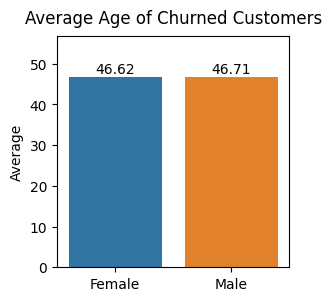

In [76]:
#1 : Find the average of customers who churned among 'Male' and 'Female' 
attrited_df = df[df['Attrition_Flag'] == 'Attrited']
avg_df = attrited_df.groupby('Gender')['Customer_Age'].mean().reset_index(name='Average Age')
avg_df['Average Age'] = avg_df['Average Age'].round(2)

plt.figure(figsize=(3,3))
sns.barplot(x='Gender', y='Average Age', data=avg_df, hue='Gender')
plt.title('Average Age of Churned Customers', y=1.02)
plt.ylabel('Average')
plt.xlabel('')
for i, row in avg_df.iterrows():
    plt.text(i, row['Average Age'] + 1, f"{row['Average Age']}", ha='center')
plt.ylim(0, avg_df['Average Age'].max() + 10)
plt.show()

#average age of churned customers for both 'Male' and 'Female' are 46 years 
#this suggest that behaviours of people approximately this age should be investigated as they are more likely to churn

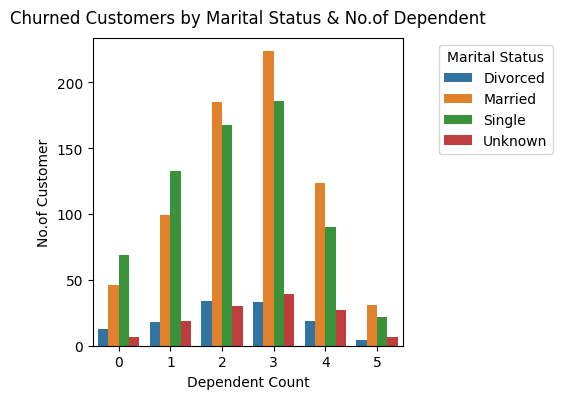

,Marital_Status,Dependent_Count,No.of Customer
0,Divorced,2,34
1,Married,3,224
2,Single,3,186
3,Unknown,3,39


In [86]:
#2 : Identify which marital status are most likely to attrify in relation to no. of dependents
attrited_df = df[df['Attrition_Flag'] == 'Attrited']
count_df = attrited_df.groupby(['Marital_Status','Dependent_Count']).size().reset_index(name='No.of Customer')

plt.figure(figsize=(4,4))
sns.barplot(x='Dependent_Count', y='No.of Customer', data=count_df, hue='Marital_Status')
plt.title('Churned Customers by Marital Status & No.of Dependent', y=1.02)
plt.xlabel('Dependent Count')
plt.ylabel('No.of Customer')
plt.ylim(0, count_df['No.of Customer'].max() + 10)
plt.legend(bbox_to_anchor=(1.3,0.8), title='Marital Status', loc='center')
plt.show()

idx = count_df.groupby('Marital_Status')['No.of Customer'].idxmax()
max_df = count_df.loc[idx].reset_index(drop=True)
max_df

#married, single and unknown groups are most likely to churn with 3 number of dependents
#married group has the most attrited likely due to reasons like 'financial restructuring',
#'high stakes financial events'
#this could indirectly relate to better rates offered by other financial institutions

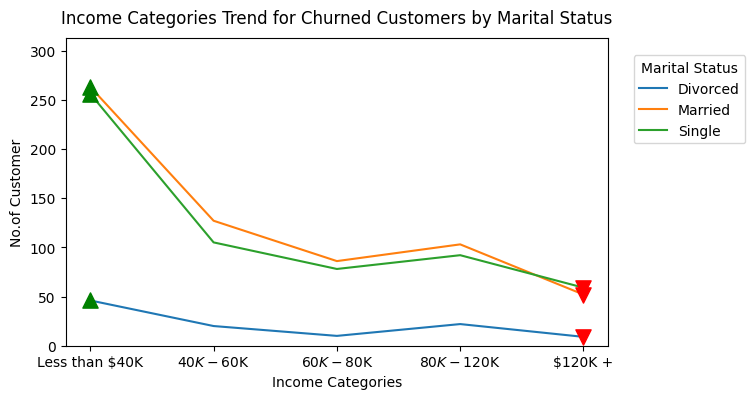

,Marital_Status,Income_Category,No.of Customer,Type
0,Divorced,Less than $40K,46,Max
1,Married,Less than $40K,263,Max
2,Single,Less than $40K,256,Max
3,Divorced,$120K +,9,Min
4,Married,$120K +,52,Min
5,Single,$120K +,59,Min


In [ ]:
#3 : Finding attrified customer income categories trend by marital status 
attrited_df = df[
    (df['Attrition_Flag'] == 'Attrited') &
    (df['Income_Category'].notna()) &
    (df['Marital_Status'] != 'Unknown')
]

income_order = ['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +']

count_df = attrited_df.groupby(['Marital_Status','Income_Category']).size().reset_index(name='No.of Customer')
count_df['Income_Category'] = pd.Categorical(
    count_df['Income_Category'],
    categories=income_order,
    ordered=True                       
)
count_df = count_df.sort_values('Income_Category')

plt.figure(figsize=(7,4))
sns.lineplot(x='Income_Category', y='No.of Customer', data=count_df, hue='Marital_Status')
ax = plt.gca()
for status, g in count_df.groupby('Marital_Status'):
    max_row = g.loc[g['No.of Customer'].idxmax()]
    ax.scatter(
        max_row['Income_Category'],
        max_row['No.of Customer'],
        s=120,
        marker='^',
        color='green',
        zorder=5
    )
    min_row = g.loc[g['No.of Customer'].idxmin()]
    ax.scatter(
        min_row['Income_Category'],
        min_row['No.of Customer'],
        s=120,
        marker='v',
        color='red',
        zorder=5
    )
plt.title('Income Categories Trend for Churned Customers by Marital Status', y=1.02)
plt.xlabel('Income Categories')
plt.ylabel('No.of Customer')
plt.ylim(0, count_df['No.of Customer'].max() + 50)
plt.legend(bbox_to_anchor=(1.15,0.8), title='Marital Status', loc='center')
plt.show()

idx = count_df.groupby('Marital_Status')['No.of Customer'].idxmax()
idx_min = count_df.groupby('Marital_Status')['No.of Customer'].idxmin()
max_df = count_df.loc[idx].reset_index(drop=True)
min_df = count_df.loc[idx_min].reset_index(drop=True)
combined_df = pd.concat(
    [max_df.assign(Type='Max'), min_df.assign(Type='Min')],
    ignore_index=True
)
combined_df

#all marital status groups share similarities where the lowest income category show highest churned customers
#highest income show the lowest churned customers
#based on the trend, overall the number of churned customers decreases with better income
#however in group 80K to 120K, the number of churned customers increased in all marital status
#this group is likely to want to change financial institution due to some reasons after securing financial stability

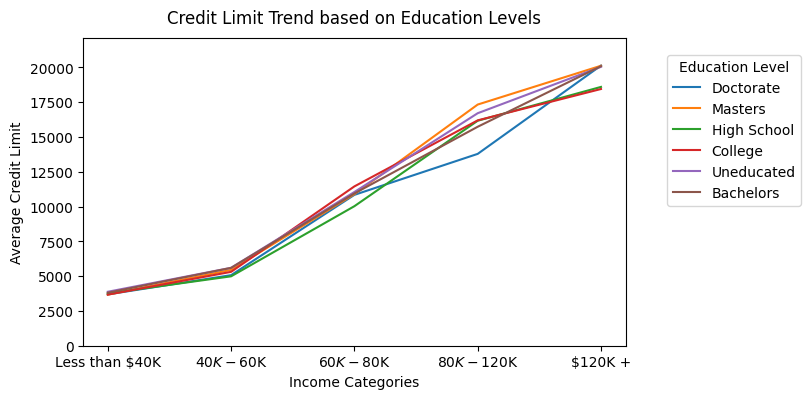

,Education_Level,Income_Category,Average Credit Limit,Type
0,Bachelors,$120K +,20090.102941,Max
1,College,$120K +,18449.914286,Max
2,Doctorate,$120K +,20134.864865,Max
3,High School,$120K +,18600.306122,Max
4,Masters,$120K +,20120.466667,Max
5,Uneducated,$120K +,20042.268908,Max
6,Bachelors,Less than $40K,3807.945566,Min
7,College,Less than $40K,3671.936232,Min
8,Doctorate,Less than $40K,3689.449367,Min
9,High School,Less than $40K,3760.076006,Min


In [ ]:
#4 : Identify the average credit limit of customers among different income categories
#   in relation to their educational background
income_order = ['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +']

avg_df = df[df['Education_Level'] != 'Unknown']
avg_df = avg_df.groupby(['Education_Level','Income_Category'])['Credit_Limit'].mean().reset_index(name='Average Credit Limit')
avg_df['Income_Category'] = pd.Categorical(
    avg_df['Income_Category'],
    categories=income_order,
    ordered=True                       
)
avg_df = avg_df.sort_values('Income_Category')

plt.figure(figsize=(7,4))
sns.lineplot(x='Income_Category', y='Average Credit Limit', data=avg_df, hue='Education_Level')
plt.title('Credit Limit Trend based on Education Levels', y=1.02)
plt.xlabel('Income Categories')
plt.ylabel('Average Credit Limit')
plt.ylim(0, avg_df['Average Credit Limit'].max()+2000)
plt.legend(bbox_to_anchor=(1.2,0.7), title='Education Level', loc='center')
plt.show()

idx = avg_df.groupby('Education_Level')['Average Credit Limit'].idxmax()
idx_min = avg_df.groupby('Education_Level')['Average Credit Limit'].idxmin()
max_df = avg_df.loc[idx].reset_index(drop=True)
min_df = avg_df.loc[idx_min].reset_index(drop=True)
combined_df = pd.concat(
    [max_df.assign(Type='Max'), min_df.assign(Type='Min')],
    ignore_index=True
)
combined_df

#all education levels share identical trend pattern where the lowest credit limit is recorded
#at the smallest income group, the credit limit is lowest
#at the highes income group, the credit limit is the highest
#higher education levels group have higher credit limit is most income groups
#this means that education levels have influence on credit limit differential 
#especially on '$60K - $80K' and '$80K - $120L' groups

In [ ]:
#5 : Finding top 10 customers at risk of churning based on number of transaction, amount
#    of transaction and revolving balance
existing_df = df[df['Attrition_Flag'] == 'Existing']
avg_revol = existing_df['Total_Revolving_Bal'].mean()
avg_trans_amt = existing_df['Total_Trans_Amt'].mean()
avg_trans_no = existing_df['Total_Trans_Ct'].mean()

existing_df = existing_df[
    (existing_df['Total_Revolving_Bal'] < avg_revol) &
    (existing_df['Total_Trans_Amt'] < avg_trans_amt) &
    (existing_df['Total_Trans_Ct'] < avg_trans_no)
]

existing_df = existing_df.sort_values(by=['Total_Revolving_Bal', 'Total_Trans_Amt', 'Total_Trans_Ct'],
                                      ascending=[False, True, True])

risk_df = existing_df.head(10)
risk_df


,Attrition_Flag,Customer_Age,Gender,Dependent_Count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_On_Book,Total_Relationship_Count,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,churn_proba,high_risk
2154,Existing,26,Male,1,College,Single,$40K - $60K,Blue,36,3,...,2703,1256,1447,0.949,2111,29,0.706,46.5,0.070000,False
2027,Existing,54,Male,3,Bachelors,Married,$80K - $120K,Blue,46,4,...,2798,1256,1542,1.132,2631,55,0.774,44.9,0.036667,False
4323,Existing,53,Male,2,Uneducated,Single,$60K - $80K,Blue,38,3,...,7062,1255,5807,0.672,3432,68,0.744,17.8,0.000000,False
5249,Existing,43,Male,2,Bachelors,Married,$80K - $120K,Blue,28,5,...,30357,1255,29102,0.788,4435,68,0.889,4.1,0.000000,False
408,Existing,51,Male,4,College,Married,$120K +,Silver,31,5,...,34516,1254,33262,0.869,1366,25,0.786,3.6,0.016667,False
3232,Existing,38,Male,2,College,Single,$40K - $60K,Blue,20,6,...,11068,1254,9814,0.418,3812,64,0.641,11.3,0.020000,False
400,Existing,46,Male,1,Uneducated,Unknown,$40K - $60K,Blue,27,6,...,12781,1253,11528,0.638,1073,21,0.400,9.8,0.080000,False
2707,Existing,42,Male,5,Unknown,Married,$60K - $80K,Blue,35,6,...,13650,1253,12397,0.743,1703,53,0.710,9.2,0.006667,False
2024,Existing,58,Male,1,Bachelors,Married,$80K - $120K,Blue,49,6,...,1654,1253,401,0.508,1887,60,0.538,75.8,0.023333,False
1327,Existing,36,Male,3,Uneducated,Married,$60K - $80K,Blue,16,4,...,1686,1252,434,0.575,1758,42,1.100,74.3,0.016667,False
